In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize

import os

In [2]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [3]:
filename = 'C:/Edu/personal/ai/datasets/commonlitreadabilityprize/train.csv'

In [4]:
df = pd.read_csv(filename)
df.columns

Index(['id', 'url_legal', 'license', 'excerpt', 'target', 'standard_error'], dtype='object')

# Columns
## id - unique ID for excerpt
## url_legal - URL of source - this is blank in the test set.
## license - license of source material - this is blank in the test set.
## excerpt - text to predict reading ease of
## target - reading ease
## standard_error - measure of spread of scores among multiple raters for each excerpt. Not included for test data.

In [5]:
df.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [6]:
len(df)

2834

In [7]:
df['target'].describe()

count    2834.000000
mean       -0.959319
std         1.033579
min        -3.676268
25%        -1.690320
50%        -0.912190
75%        -0.202540
max         1.711390
Name: target, dtype: float64

In [8]:
df['standard_error'].describe()

count    2834.000000
mean        0.491435
std         0.034818
min         0.000000
25%         0.468543
50%         0.484721
75%         0.506268
max         0.649671
Name: standard_error, dtype: float64

# Cleaning
### Hay algunos NaN pero en columnas irrelevantes.
### Ojo, hay rates 0.0 en una fila: por eso la distorsión en el min del std_err

In [9]:
df[df['target'] == 0.0]

,id,url_legal,license,excerpt,target,standard_error
106,436ce79fe,NaN,NaN,"The sun was shining in a cloudless sky, and no...",0.0,0.0


C:\Users\es_i01738\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='standard_error', ylabel='Density'>

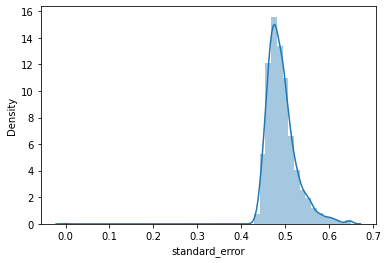

In [10]:
sns.distplot(df['standard_error'])

In [11]:
df = df.drop([106])

In [12]:
df['standard_error'].describe()

count    2833.000000
mean        0.491609
std         0.033577
min         0.428233
25%         0.468553
50%         0.484748
75%         0.506304
max         0.649671
Name: standard_error, dtype: float64

C:\Users\es_i01738\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

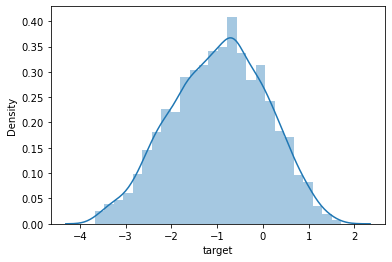

In [13]:
sns.distplot(df['target'])

C:\Users\es_i01738\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='standard_error', ylabel='Density'>

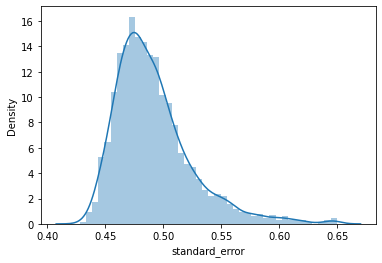

In [14]:
sns.distplot(df['standard_error'])

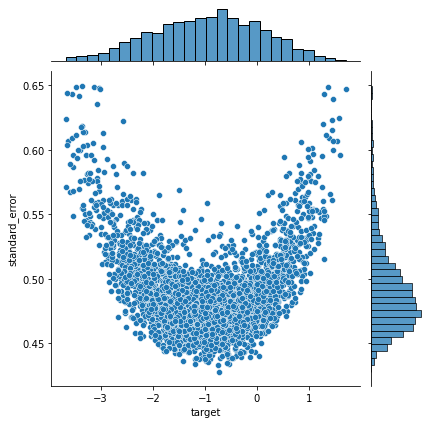

In [15]:
sns.jointplot(x='target', y='standard_error', data=df)

# De acuerdo
### Veamos los textos donde los raters estuvieron de acuerdo sobre su facilidad de lectura:
### Ordenado por mayor target (y observemos el standard error).

# Los mejores textos:

In [19]:
mejores = df[['id','excerpt', 'target', 'standard_error']].sort_values('target', ascending = False)[:20]

In [20]:
mejores.head()

,id,excerpt,target,standard_error
2829,25ca8f498,When you think of dinosaurs and where they liv...,1.711390,0.646900
981,849971671,"For her last birthday, Sisanda had a special t...",1.597870,0.596349
808,8f35441e3,"Every day, Emeka's father took him to school i...",1.583847,0.624776
1014,7a1d484be,More people came to the bus stop just before 9...,1.541672,0.606997
1066,016913371,Grandma's garden was wonderful. It was full of...,1.467665,0.599600


# Los peores textos:

In [23]:
peores = df[['id','excerpt', 'target', 'standard_error']].sort_values('target', ascending = True)[:20]
peores.head()

,id,excerpt,target,standard_error
1705,4626100d8,"The commutator is peculiar, consisting of only...",-3.676268,0.623621
1128,493b80aa7,The Dunwich horror itself came between Lammas ...,-3.668360,0.571404
1754,fe44cbd14,"The iron cylinder weighs 23 kilogrammes; but, ...",-3.642892,0.644398
1752,284eaa5ad,As to surface-slope its measurement—from nearl...,-3.639936,0.603819
1720,9e9eacb49,"The tree is dioecious, bearing male catkins on...",-3.636834,0.606822


# Observaciones
## 1. 
## 2. 

In [ ]:
data.shape

In [ ]:
cols = data.columns.values
cols

In [ ]:
n_cols = len(cols)
n_cols

In [ ]:
data.describe()

In [ ]:
data.dtypes